# 数据的描述

在进行建模前，先对数据进行描述统计，大致了解现有的数据

## 导入数据

In [1]:
#pandas和numpy用于数据的处理
import pandas as pd
import numpy as np
import re

#matplotlib用于数据的可视化
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline

#忽略pandsa的警告
import warnings
warnings.filterwarnings('ignore')

#为了画图更好看
import seaborn as sns  
sns.set( palette="muted", color_codes=True) 

In [2]:
#导入已经集成好的数据
ipo=pd.read_csv("IPO.csv")

In [3]:
#查看数据
ipo.head()

,Stkcd,Total assets,Total debts,Cash flow from operations,Sales,Operating profit,Net income,One day excess return,Offer price,number of shares sold,ROA1,ROA2,Total assets turnover rate,Debt ratio,Firm age,Issue proceeds(USD),year,Stock market sentiment,Sales method
0,2705,3.390104e+09,2.068954e+09,5.592463e+08,5.041712e+09,2.447157e+08,1.922726e+08,0.467994,10.500000,7600.0000,0.056716,0.072185,1.487185,0.389708,18.126027,13067.827823,2014,-0.022301,1
1,2706,6.125454e+08,2.356095e+08,6.992491e+07,6.838492e+08,8.796354e+07,8.105681e+07,0.425468,19.099998,2154.0000,0.132328,0.143603,1.116406,0.615360,7.293151,6737.201547,2014,0.009827,1
2,2708,7.845328e+08,2.831599e+08,3.287824e+07,5.805561e+08,6.194554e+07,5.317030e+07,0.420506,11.880000,3320.0000,0.067773,0.078959,0.740002,0.639072,2.986301,6458.847594,2014,0.009827,1
3,300357,2.635215e+08,1.223968e+07,5.558691e+07,1.936098e+08,8.163514e+07,6.991001e+07,0.469495,20.050005,2525.0000,0.265291,0.309785,0.734702,0.953553,11.347945,8290.417208,2014,-0.022301,1
4,300358,1.076322e+09,6.208643e+08,1.388938e+08,7.972057e+08,1.400280e+08,1.351335e+08,0.446298,40.000000,1824.9813,0.125551,0.130099,0.740676,0.423161,11.210959,11954.156486,2014,-0.022301,1


## 数据分析

### IPO的抑价率的分析

In [4]:
ipo['One day excess return'].mean()

0.4244478029850746

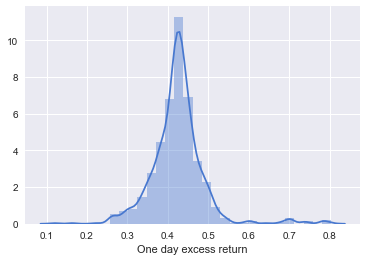

In [5]:
temp=ipo.sort_values('One day excess return')['One day excess return']
sns.distplot(temp,color="b", bins=30,label="the distribution of One Day Excess Return")

根据上图显示，首日回报率的分布近似正态分布，均值为0.424309。相比于其他国家，中国的股市存在非常普遍的抑价现象，少数IPO抑价现象十分严重。

(0, 500)

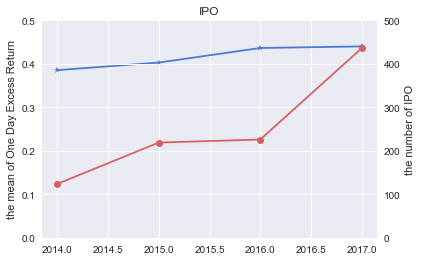

In [6]:
temp2=ipo.copy()
#画出每年新股上市的数目和新股抑价率的均值
ipo_mean=temp2.groupby(['year'])['One day excess return'].mean()
ipo_count=temp2.groupby(['year'])['Stkcd'].count()
#设置双坐标轴
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ipo_mean,'b-*')
ax1.set_ylabel('the mean of One Day Excess Return')
ax1.set_title("IPO")
ax1.set_ylim(0,0.5)

ax2 = ax1.twinx()  # this is the important function
ax2.plot(ipo_count, 'r-o')
ax2.set_ylabel('the number of IPO')
ax2.set_xlabel('year')
ax2.set_ylim(0,500)

- 从近四年的数据来看,上市公司的数量在稳步增长，在17年突破了400家；而平均抑价率则增长比较平缓，维持在0.4上下。

In [7]:
#分年份的新股抑价率的统计描述
ipo.groupby(['year'])['One day excess return'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2014,124.0,0.385549,0.054677,0.118724,0.365258,0.382008,0.414789,0.528730
2015,219.0,0.402952,0.114810,0.223207,0.340218,0.378525,0.424191,0.803756
2016,226.0,0.436462,0.043211,0.289898,0.407873,0.432286,0.459350,0.583653
2017,436.0,0.440081,0.030127,0.331546,0.420029,0.434749,0.454619,0.554606


### IPO和发行方式的分析

In [8]:
temp=ipo.copy()
temp[['Stkcd','Sales method']].groupby(['Sales method']).count()

,Stkcd
Sales method,
0,153
1,852


从销售方式来看，大多数的公司选择了上网定价和网下询价两种发行方式，仅有153家只使用了上网定价方式发行。

In [9]:
#按照发行方式的统计描述
temp[['One day excess return','Sales method']].groupby(['Sales method']).describe()

One day excess return                                          \
                             count      mean       std       min       25%   
Sales method                                                                 
0                            153.0  0.441819  0.039827  0.289898  0.418307   
1                            852.0  0.421328  0.070157  0.118724  0.387352   

                                            
                   50%       75%       max  
Sales method                                
0             0.435086  0.461938  0.544837  
1             0.421801  0.447213  0.803756

可以看出，在所有采用了上网定价方式的IPO公司中，还采用了网下询价的公司的抑价率要略低于未采用网下询价的公司。

### IPO和行情的分析

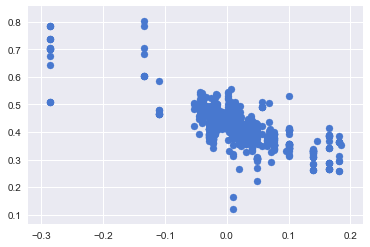

In [10]:
#刻画21的上证指数回报率与新股首日日回报率的散点图
temp1=ipo[['Stock market sentiment','One day excess return']]
plt.scatter(temp1['Stock market sentiment'],temp1['One day excess return'])

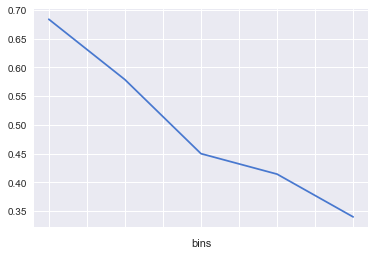

In [11]:
#21的上证指数回报率的分组与新股首日日回报率的曲线图
temp2=temp1.sort_values('Stock market sentiment')
temp2['bins']=pd.cut(temp2['Stock market sentiment'],bins=5)
temp2.groupby(['bins'])['One day excess return'].mean().plot()

In [12]:
#按照21的上证指数回报率的分组对新股首日日回报率的统计描述
temp2[['bins','One day excess return']].groupby(['bins']).describe()

One day excess return                                \
                                    count      mean       std       min   
bins                                                                      
(-0.287, -0.192]                     17.0  0.683630  0.092445  0.507173   
(-0.192, -0.0978]                    16.0  0.578668  0.116926  0.465992   
(-0.0978, -0.00349]                 272.0  0.449832  0.037570  0.342442   
(-0.00349, 0.0908]                  611.0  0.414229  0.043761  0.118724   
(0.0908, 0.185]                      89.0  0.339791  0.046740  0.257588   

                                                             
                          25%       50%       75%       max  
bins                                                         
(-0.287, -0.192]     0.676944  0.700026  0.739011  0.785454  
(-0.192, -0.0978]    0.466247  0.592995  0.623536  0.803756  
(-0.0978, -0.00349]  0.426274  0.448394  0.476302  0.544837  
(-0.00349, 0.0908]   0.393209  0.418772  0.437388  0.554606  
(0.0908, 0.185]      0.311941  0.340286  0.365143  0.528730

### IPO与发行价格的分析

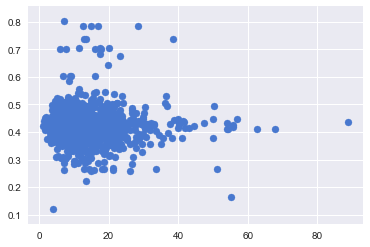

In [13]:
#刻画新股发行价格与新股首日日回报率的散点图
temp1=ipo[['Offer price','One day excess return']]
plt.scatter(temp1['Offer price'],temp1['One day excess return'])

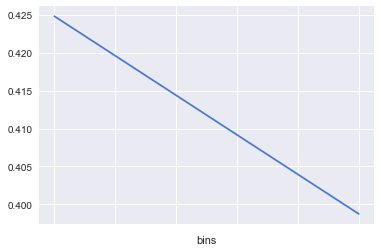

In [14]:
#21的新股发行价格的分组与新股首日日回报率的曲线图
temp2=temp1.sort_values('Offer price')
temp2['bins']=pd.cut(temp2['Offer price'],bins=2)
temp2.groupby(['bins'])['One day excess return'].mean().plot()

In [15]:
#按照新股发行价格的分组对新股首日日回报率的统计描述
temp2[['bins','One day excess return']].groupby(['bins']).describe()

One day excess return                                          \
                                count      mean       std       min       25%   
bins                                                                            
(1.173, 44.965]                 990.0  0.424837  0.066559  0.118724  0.393071   
(44.965, 88.67]                  15.0  0.398740  0.081395  0.162652  0.410344   

                                               
                      50%       75%       max  
bins                                           
(1.173, 44.965]  0.425343  0.450842  0.803756  
(44.965, 88.67]  0.419773  0.434065  0.492467

可以看出大部分的上市公司发行价格较低，抑价率也较高。仅有少数公司的发行价格较高。

### IPO与公司成立年限的分析

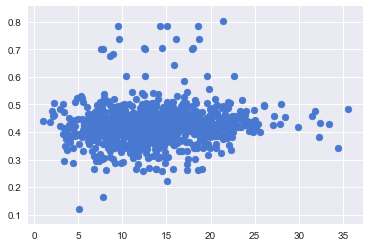

In [16]:
#刻画公司成立年限与新股首日日回报率的散点图
temp1=ipo[['Firm age','One day excess return']]
plt.scatter(temp1['Firm age'],temp1['One day excess return'])

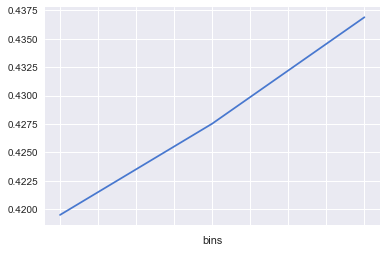

In [17]:
#公司成立年限的分组与新股首日日回报率的曲线图
temp2=temp1.sort_values('Firm age')
temp2['bins']=pd.cut(temp2['Firm age'],bins=3)
temp2.groupby(['bins'])['One day excess return'].mean().plot()

In [18]:
#按照公司成立年限的分组对新股首日日回报率的统计描述
temp2[['bins','One day excess return']].groupby(['bins']).describe()

One day excess return                                \
                                 count      mean       std       min   
bins                                                                   
(1.023, 12.544]                  419.0  0.419501  0.069878  0.118724   
(12.544, 24.031]                 558.0  0.427537  0.065456  0.223207   
(24.031, 35.518]                  28.0  0.436903  0.036873  0.340268   

                                                          
                       25%       50%       75%       max  
bins                                                      
(1.023, 12.544]   0.384711  0.419872  0.447167  0.785454  
(12.544, 24.031]  0.401067  0.426172  0.451690  0.803756  
(24.031, 35.518]  0.418083  0.433571  0.457906  0.500829

公司的成立年限越长，IPO抑价率将会越高

### IPO与资金周转率的分析

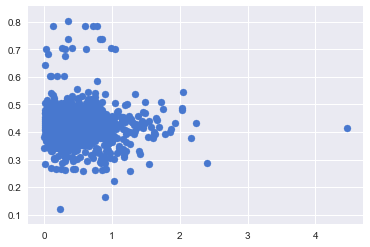

In [45]:
#刻画资产周转率与新股首日日回报率的散点图
temp1=ipo[['Total assets turnover rate','One day excess return']]
plt.scatter(temp1['Total assets turnover rate'],temp1['One day excess return'])

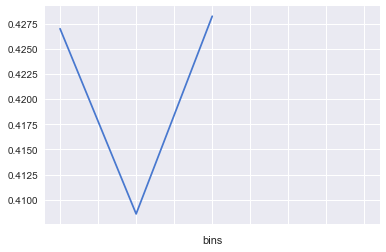

In [48]:
#资产周转率的分组与新股首日日回报率的曲线图
temp2=temp1.sort_values('Total assets turnover rate')
temp2['bins']=pd.cut(temp2['Total assets turnover rate'],bins=5)
temp2.groupby(['bins'])['One day excess return'].mean().plot()

In [49]:
#按照资产周转率的分组对新股首日日回报率的统计描述
temp2[['bins','One day excess return']].groupby(['bins']).describe()

One day excess return                                \
                                  count      mean       std       min   
bins                                                                    
(-0.00317, 0.894]                 856.0  0.426995  0.066150  0.118724   
(0.894, 1.786]                    139.0  0.408589  0.069061  0.162652   
(1.786, 2.679]                      9.0  0.428232  0.074040  0.287302   
(2.679, 3.571]                      0.0       NaN       NaN       NaN   
(3.571, 4.464]                      1.0  0.414041       NaN  0.414041   

                                                           
                        25%       50%       75%       max  
bins                                                       
(-0.00317, 0.894]  0.395201  0.425733  0.451905  0.803756  
(0.894, 1.786]     0.379951  0.418760  0.441452  0.703673  
(1.786, 2.679]     0.399890  0.431058  0.480588  0.546389  
(2.679, 3.571]          NaN       NaN       NaN       NaN  
(3.571, 4.464]     0.414041  0.414041  0.414041  0.414041

去除极端值的影响，资产的周转率大致可以分成两组，资产的周转率高的组，其平均抑价率要略低于资产周转率低的组。

### IPO与总资产的分析

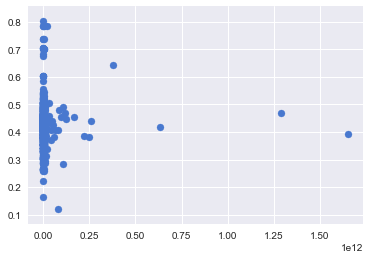

In [35]:
#刻画总资产与新股首日日回报率的散点图
temp1=ipo[['Total assets','One day excess return']]
plt.scatter(temp1['Total assets'],temp1['One day excess return'])

大部分公司的总资产差不多，分布比较集中，总资产与抑价率之间没有明显的线性相关性。

### 连续变量的统计描述

In [25]:
#对连续变量进行统计描述
data=ipo.drop(['Stkcd','Sales method','One day excess return','year'],axis=1)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Total assets,1005.0,7.352785e+09,7.192998e+10,1.665745e+08,4.757266e+08,7.478567e+08,1.452455e+09,1.650924e+12
Total debts,1005.0,6.066864e+09,6.724675e+10,1.223968e+07,1.464144e+08,2.957967e+08,7.112413e+08,1.547106e+12
Cash flow from operations,1005.0,3.480139e+08,4.006169e+09,-5.464491e+09,-3.474557e+05,3.743735e+07,9.209792e+07,1.049198e+11
Sales,1005.0,1.008687e+09,2.944993e+09,8.819554e+05,1.898927e+08,3.862058e+08,7.980865e+08,4.796327e+10
Operating profit,1005.0,1.557077e+08,6.509000e+08,-3.800331e+07,2.918254e+07,5.449524e+07,1.094049e+08,1.240932e+10
Net income,1005.0,1.359925e+08,5.535242e+08,-2.790031e+07,2.703901e+07,5.041203e+07,9.445033e+07,1.094200e+10
Offer price,1005.0,1.452804e+01,9.039037e+00,1.260000e+00,8.779997e+00,1.237000e+01,1.802999e+01,8.866999e+01
number of shares sold,1005.0,5.800070e+03,1.715753e+04,1.000000e+03,2.000000e+03,2.889000e+03,5.000000e+03,3.891000e+05
ROA1,1005.0,7.415042e-02,5.885633e-02,-4.808133e-02,3.159709e-02,6.092397e-02,1.022649e-01,4.764298e-01
ROA2,1005.0,8.169868e-02,6.538665e-02,-5.739027e-02,3.467298e-02,6.926399e-02,1.126929e-01,4.941597e-01


### 连续变量间的相关性检验

In [26]:
data.corr() 

,Total assets,Total debts,Cash flow from operations,Sales,Operating profit,Net income,Offer price,number of shares sold,ROA1,ROA2,Total assets turnover rate,Debt ratio,Firm age,Issue proceeds(USD),Stock market sentiment
Total assets,1.000000,0.999229,0.943218,0.459857,0.921093,0.913230,-0.033190,0.400885,-0.096758,-0.094711,-0.110156,-0.239344,0.024070,0.487297,-0.028994
Total debts,0.999229,1.000000,0.942989,0.448133,0.910283,0.901643,-0.030868,0.373443,-0.093459,-0.091703,-0.106725,-0.233094,0.026092,0.464172,-0.027236
Cash flow from operations,0.943218,0.942989,1.000000,0.401356,0.833616,0.838217,-0.004123,0.313397,-0.066892,-0.064695,-0.081650,-0.199680,0.038458,0.457046,-0.018989
Sales,0.459857,0.448133,0.401356,1.000000,0.563045,0.571961,-0.033315,0.477881,-0.070407,-0.058943,0.158910,-0.330354,-0.055023,0.348903,0.006415
Operating profit,0.921093,0.910283,0.833616,0.563045,1.000000,0.993332,0.012557,0.580959,-0.027394,-0.016563,-0.060530,-0.252759,-0.000626,0.622774,-0.026192
Net income,0.913230,0.901643,0.838217,0.571961,0.993332,1.000000,0.013057,0.622726,-0.023671,-0.016954,-0.059683,-0.251974,-0.005760,0.627783,-0.022314
Offer price,-0.033190,-0.030868,-0.004123,-0.033315,0.012557,0.013057,1.000000,-0.147350,0.435881,0.447412,0.171446,0.120481,0.009838,0.101055,-0.003913
number of shares sold,0.400885,0.373443,0.313397,0.477881,0.580959,0.622726,-0.147350,1.000000,-0.133570,-0.129774,-0.129761,-0.272131,-0.046717,0.712919,-0.041176
ROA1,-0.096758,-0.093459,-0.066892,-0.070407,-0.027394,-0.023671,0.435881,-0.133570,1.000000,0.978415,0.511046,0.421944,-0.028401,-0.043092,0.035840
ROA2,-0.094711,-0.091703,-0.064695,-0.058943,-0.016563,-0.016954,0.447412,-0.129774,0.978415,1.000000,0.529650,0.404393,-0.018165,-0.032392,0.031877


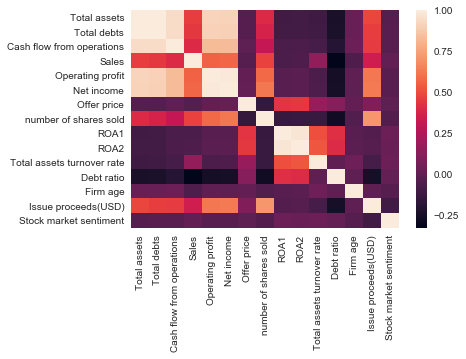

In [27]:
#查看变量间的相关性
temp= data.corr()  #test_feature => pandas.DataFrame#
sns.heatmap(temp)
plt.show()

In [28]:
#查看变量间相关性大于0.8的
Corr=data.corr()
Corr[Corr>0.8]

,Total assets,Total debts,Cash flow from operations,Sales,Operating profit,Net income,Offer price,number of shares sold,ROA1,ROA2,Total assets turnover rate,Debt ratio,Firm age,Issue proceeds(USD),Stock market sentiment
Total assets,1.000000,0.999229,0.943218,NaN,0.921093,0.913230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total debts,0.999229,1.000000,0.942989,NaN,0.910283,0.901643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cash flow from operations,0.943218,0.942989,1.000000,NaN,0.833616,0.838217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Operating profit,0.921093,0.910283,0.833616,NaN,1.000000,0.993332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Net income,0.913230,0.901643,0.838217,NaN,0.993332,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Offer price,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number of shares sold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROA1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.978415,NaN,NaN,NaN,NaN,NaN
ROA2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.978415,1.000000,NaN,NaN,NaN,NaN,NaN


可以看出只有少数财务相关变量间的相关系数大于了0.8